<a href="https://colab.research.google.com/github/sahanashetty31/EIP-4.0/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras


Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


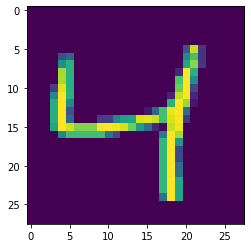

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
nets = 15
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Convolution2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Convolution2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Convolution2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Convolution2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Convolution2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Convolution2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Convolution2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model[j].summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_99 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_100 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_101 (Bat (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_43 (Dropout)         (None, 12, 12, 32)      

In [0]:
model[j].compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model[j].fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 281s 5ms/step - loss: 0.0590 - acc: 0.9819
Epoch 2/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0468 - acc: 0.9857
Epoch 3/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0424 - acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0366 - acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0347 - acc: 0.9893
Epoch 6/10
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0286 - acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0285 - acc: 0.9909
Epoch 8/10
60000/60000 [==============================] - 281s 5ms/step - loss: 0.0256 - acc: 0.9921
Epoch 9/10
60000/60000 [==============================] - 277s 5ms/step - loss: 0.0235 - acc: 0.9923
Epoch 10/10
60000/60000 [==============================] - 277s 5ms/step - loss: 0.0214 - a

In [0]:
score = model[j].evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.017095369858070628, 0.9947]
